#  SQLite3

In [7]:
import sqlite3

# connecting with database (If there is no database exists, It will create one).
db = sqlite3.connect("student_database2.db")

In [8]:
# declaring cursor

cursor = db.cursor()

In [ ]:
# sql = "DROP TABLE XYZ"        --- This is a method to detail a table
# cursor.execute(sql)

In [3]:
# Creating a Table

cursor.execute("CREATE TABLE student_data2(phone_number INT PRIMARY KEY, email_id TEXT, course_name TEXT, fee_paid INT)")

#CREATE TABLE is a syntax to create table
#PRIMARY KEY is a syntax to make sure phone_number in the data are unique. 
# INT which is mention with phone_number is used to make sure its numbers only.

In [4]:
#Inserting record into the table (Single record inserting)

cursor.execute("INSERT INTO student_data2(phone_number, email_id, course_name, fee_paid) VALUES (98997587968, 'student1@data.com', 'datascience', 65000)")

#saving the record permanently. (If you don't commit, next time you will not see the records in the table)
db.commit()

# count of recored inserted
print (cursor.rowcount, "Record(s) inserted")

1 Record(s) inserted


# SELECT query - How to fetch records from the table

In [5]:
results = cursor.execute("SELECT * FROM student_data2")
for row in results:
    print(row)

(98997587968, 'student1@data.com', 'datascience', 65000)


# Multiple records insertion

In [6]:
cursor.execute("INSERT INTO student_data2 VALUES(9847552647,'Student2@data.com','maths2',2560),(857951575,'student3@data.com','science2',3560)")

db.commit()

#count of record inserted
print(cursor.rowcount,"Record(s) inserted")

2 Record(s) inserted


# How to load data from file into table.

Note: Keep CSV file in the same folder where your jupyter notebook is present or provide folder link. You cannot open directly from Github.

In [8]:
with open('DS_Students2.csv','r') as file:
    no_records = 0
    for row in file:
        cursor.execute("INSERT INTO student_data2 VALUES ( ?,?,?,? )",row.split(","))
        db.commit()
        no_records +=1

print(no_records, ' Records Inserted')

# we are inserting a CSV data file into the student_data2
## ('DS_Students2.csv','r') as file:       - it means that 'r' = read the file, file: = keep the csv file as file (variable)
# no_records = 0 is used to make no_records as variable of 0 and to keep track of how many data is inserted from CSV file
# (?,?,?,?) this represents the number of values in a row of csv file. 
# for example our csv file has phone_number, email_id, course_name, fee_paid = (?,?,?,?)
# row.split(",") this means in the CSV file make sure to use coma when you move to next value.
# row.split(",") also makes sure that python is reading the data from right not left due to coma.
# no_record +=1 is used to keep track as well as making sure its adding and keeping records of inserted data


20  Records Inserted


In [9]:
results = cursor.execute("SELECT * FROM student_data2")

for row in results:
    print(row)

# SELECT * means select all the data present in student_data2

(98997587968, 'student1@data.com', 'datascience', 65000)
(9847552647, 'Student2@data.com', 'maths2', 2560)
(857951575, 'student3@data.com', 'science2', 3560)
(9988776604, 'student4@gmail.com', 'Digital Marketing', 38000)
(9988776605, 'student5@gmail.com', 'Data Science', 133000)
(9988776606, 'student6@gmail.com', 'Data Science', 34000)
(9988776607, 'student7@gmail.com', 'Data Science', 33000)
(9988776608, 'student8@gmail.com', 'Data Science', 12900)
(99887766091, 'student9@gmail.com', 'Data Science', 40000)
(9988776610, 'student10@gmail.com', 'Data Analytics', 32500)
(9988776611, 'student11@gmail.com', 'Data Science', 41500)
(988776612, 'student12@gmail.com', 'Digital Marketing', 31000)
(9988776613, 'student13@gmail.com', 'Digital Marketing', 23000)
(9988776614, 'student14@gmail.com', 'Data Science', 24000)
(9988776615, 'student15@gmail.com', 'Data Science', 23000)
(9988776616, 'student16@gmail.com', 'Data Science', 122500)
(9988776617, 'student17@gmail.com', 'Data Science', 29000)
(99

# WHERE clause - select records based on condition
### it is used to find the specific part or row from a database based on a condition

In [11]:
sql = "SELECT * FROM student_data2 WHERE course_name = 'Data Science'"
result = cursor.execute(sql)
for row in result:
    print(row)
    
# In this code we made sure that its fetching the row which only contains Data Science in it

(9988776605, 'student5@gmail.com', 'Data Science', 133000)
(9988776606, 'student6@gmail.com', 'Data Science', 34000)
(9988776607, 'student7@gmail.com', 'Data Science', 33000)
(9988776608, 'student8@gmail.com', 'Data Science', 12900)
(99887766091, 'student9@gmail.com', 'Data Science', 40000)
(9988776611, 'student11@gmail.com', 'Data Science', 41500)
(9988776614, 'student14@gmail.com', 'Data Science', 24000)
(9988776615, 'student15@gmail.com', 'Data Science', 23000)
(9988776616, 'student16@gmail.com', 'Data Science', 122500)
(9988776617, 'student17@gmail.com', 'Data Science', 29000)
(9988776618, 'student18@gmail.com', 'Data Science', 140000)
(998876621, 'student21@gmail.com', 'Data Science', 131000)
(9988546622, 'student22@gmail.com', 'Data Science', 23000)
(998845873, 'student23@gmail.com', 'Data Science', 24000)


In [13]:
sql = "SELECT * FROM student_data2 WHERE fee_paid > 40000"     #using WHERE syntax to show only data of fee_paid more then 40000
result = cursor.execute(sql)
for row in result:
    print(row)

(98997587968, 'student1@data.com', 'datascience', 65000)
(9988776605, 'student5@gmail.com', 'Data Science', 133000)
(9988776611, 'student11@gmail.com', 'Data Science', 41500)
(9988776616, 'student16@gmail.com', 'Data Science', 122500)
(9988776618, 'student18@gmail.com', 'Data Science', 140000)
(998806620, 'student20@gmail.com', 'inv Banking', 141500)
(998876621, 'student21@gmail.com', 'Data Science', 131000)


# DELETE records - How to delete unwanted records.

Usually developers/Data Scientists are not authorized to delete any records from the table. Database admin does this kind of tasks

In [20]:
sql = "DELETE FROM student_data2 WHERE phone_number = 988776612"

cursor.execute(sql)
db.commit()

In [21]:
result = cursor.execute("SELECT * FROM student_data2")
for row in result:
    print(row)

(98997587968, 'student1@data.com', 'datascience', 65000)
(9847552647, 'Student2@data.com', 'maths2', 2560)
(857951575, 'student3@data.com', 'science2', 3560)
(9988776604, 'student4@gmail.com', 'Digital Marketing', 38000)
(9988776605, 'student5@gmail.com', 'Data Science', 133000)
(9988776606, 'student6@gmail.com', 'Data Science', 34000)
(9988776607, 'student7@gmail.com', 'Data Science', 33000)
(9988776608, 'student8@gmail.com', 'Data Science', 12900)
(99887766091, 'student9@gmail.com', 'Data Science', 40000)
(9988776610, 'student10@gmail.com', 'Data Analytics', 32500)
(9988776611, 'student11@gmail.com', 'Data Science', 41500)
(9988776613, 'student13@gmail.com', 'Digital Marketing', 23000)
(9988776614, 'student14@gmail.com', 'Data Science', 24000)
(9988776615, 'student15@gmail.com', 'Data Science', 23000)
(9988776616, 'student16@gmail.com', 'Data Science', 122500)
(9988776617, 'student17@gmail.com', 'Data Science', 29000)
(9988776618, 'student18@gmail.com', 'Data Science', 140000)
(99887

# ORDER By

#How to change the order of records (Increasing or decreasing)

In [22]:
result = cursor.execute("SELECT * FROM student_data2 ORDER By fee_paid")   #sorted based on increasing order of fee_paid
for row in result:
    print(row)

(9847552647, 'Student2@data.com', 'maths2', 2560)
(857951575, 'student3@data.com', 'science2', 3560)
(9988776608, 'student8@gmail.com', 'Data Science', 12900)
(9988776613, 'student13@gmail.com', 'Digital Marketing', 23000)
(9988776615, 'student15@gmail.com', 'Data Science', 23000)
(9988546622, 'student22@gmail.com', 'Data Science', 23000)
(9988776614, 'student14@gmail.com', 'Data Science', 24000)
(998845873, 'student23@gmail.com', 'Data Science', 24000)
(9988776617, 'student17@gmail.com', 'Data Science', 29000)
(9988776610, 'student10@gmail.com', 'Data Analytics', 32500)
(9988776619, 'student19@gmail.com', 'Data Analytics', 32500)
(9988776607, 'student7@gmail.com', 'Data Science', 33000)
(9988776606, 'student6@gmail.com', 'Data Science', 34000)
(9988776604, 'student4@gmail.com', 'Digital Marketing', 38000)
(99887766091, 'student9@gmail.com', 'Data Science', 40000)
(9988776611, 'student11@gmail.com', 'Data Science', 41500)
(98997587968, 'student1@data.com', 'datascience', 65000)
(998877

In [23]:
result = cursor.execute("SELECT * FROM student_data2 ORDER By fee_paid desc")   #sorted based on decreasing order of fee_paid
for row in result:
    print(row)

(998806620, 'student20@gmail.com', 'inv Banking', 141500)
(9988776618, 'student18@gmail.com', 'Data Science', 140000)
(9988776605, 'student5@gmail.com', 'Data Science', 133000)
(998876621, 'student21@gmail.com', 'Data Science', 131000)
(9988776616, 'student16@gmail.com', 'Data Science', 122500)
(98997587968, 'student1@data.com', 'datascience', 65000)
(9988776611, 'student11@gmail.com', 'Data Science', 41500)
(99887766091, 'student9@gmail.com', 'Data Science', 40000)
(9988776604, 'student4@gmail.com', 'Digital Marketing', 38000)
(9988776606, 'student6@gmail.com', 'Data Science', 34000)
(9988776607, 'student7@gmail.com', 'Data Science', 33000)
(9988776610, 'student10@gmail.com', 'Data Analytics', 32500)
(9988776619, 'student19@gmail.com', 'Data Analytics', 32500)
(9988776617, 'student17@gmail.com', 'Data Science', 29000)
(9988776614, 'student14@gmail.com', 'Data Science', 24000)
(998845873, 'student23@gmail.com', 'Data Science', 24000)
(9988776613, 'student13@gmail.com', 'Digital Marketi

# UPDATE table- Update the specific column in value

In [25]:
# single record update

sql = "UPDATE student_data2 SET course_name = 'Data Science' WHERE phone_number = 9988776613"
cursor.execute(sql)

In [28]:
# check if course name updated for the perticular number
sql = "SELECT * FROM student_data2 WHERE phone_number = 9988776613"
result = cursor.execute(sql)
for row in result:
    print(row)
    
# its updated from Digital Marketing to Data Science

(9988776613, 'student13@gmail.com', 'Data Science', 23000)


In [29]:
# Multiple records update using 'IN'

sql = "UPDATE student_data2 SET fee_paid = 140000 WHERE phone_number IN (9988776608,9988546622)"
cursor.execute(sql)

In [15]:
# Verifing if its updated

result = cursor.execute("SELECT phone_number,fee_paid FROM student_data2 WHERE phone_number IN (99887766091,9988546622)")
for row in result:
    print(row)

(9988546622, 23000)
(99887766091, 40000)


In [9]:
# Update records using BETWEEN (This will update all the records between the range given)

sql = "UPDATE student_data2 SET course_name = 'Statistics' WHERE phone_number BETWEEN 99887766091 AND 9847552647"
cursor.execute(sql)


In [13]:
#verify if its updated
result = cursor.execute("SELECT phone_number,course_name FROM student_data2 WHERE course_name = 'Data Science'")
for row in result:
    print(row)

(9988776605, 'Data Science')
(9988776606, 'Data Science')
(9988776607, 'Data Science')
(9988776608, 'Data Science')
(99887766091, 'Data Science')
(9988776611, 'Data Science')
(9988776614, 'Data Science')
(9988776615, 'Data Science')
(9988776616, 'Data Science')
(9988776617, 'Data Science')
(9988776618, 'Data Science')
(998876621, 'Data Science')
(9988546622, 'Data Science')
(998845873, 'Data Science')


# MIN and MAX Functions


In [14]:

# MIN
result = cursor.execute("SELECT MIN(fee_paid) FROM student_data2")
print ('Minimum fees = ', result.fetchone())


# MAX
result = cursor.execute("SELECT MAX(fee_paid) FROM student_data2")
print ('Maximum fees = ', result.fetchone())

Minimum fees =  (2560,)
Maximum fees =  (141500,)


# Subquery

In SQL a subquery is a query within another query. In other words we can say that a subquery is a query that is embedded in WHERE clause of another SQL query. Important rules for subqueries:

You can place the subquery in a number of SQL clauses: WHERE cluase, FROM clause. subquery can be used with SELECT, UPDATE, INSERT, DELETE statements along with expression operator. It could be equality operator or comparison operator such as =,>,=,<= and like operator.

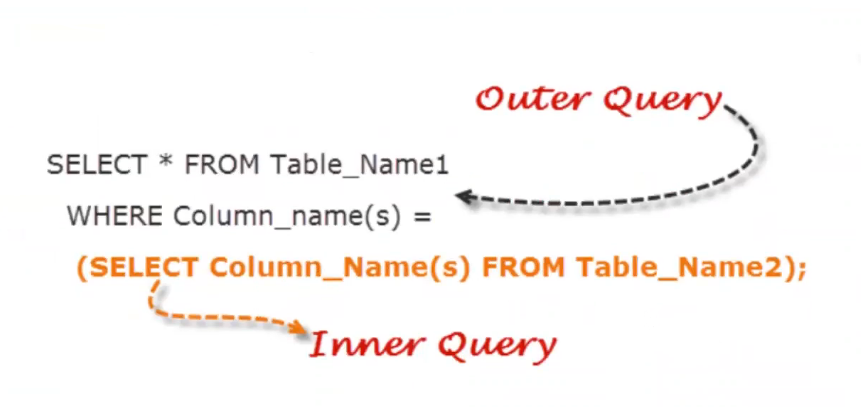

# Example:

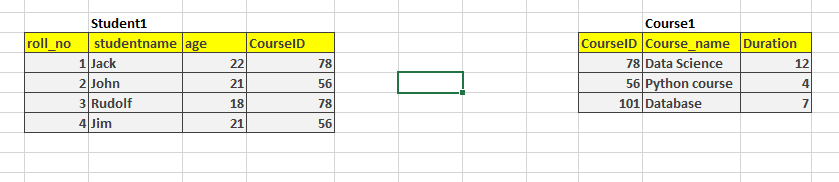


#### student1 = parent table
#### course1 = child table 


In [ ]:
#db=sqlite3.connect("student_course_database.db")

In [ ]:
#cur=db.cursor()

In [14]:
cursor.execute("CREATE TABLE Course1 (CourseID int primary key,Coursename text,Duration int)")

#creating a table for course1 & its key

In [15]:
cursor.execute("CREATE TABLE Student1(roll_no int primary key,studentname text,age int,CourseID int,foreign key(CourseID) references Course1(CourseID))")

#creating a table for student1 & its key

In [19]:
cursor.execute("INSERT INTO Course1 VALUES(78,'Data science',12),(56,'Python course',4),(101,'Database',7)")

print(cursor.rowcount,"record(s) inserted ")

db.commit;                              #adding values to the table of course1

3 record(s) inserted 


In [20]:
cursor.execute("INSERT INTO Student1 VALUES(1,'Jack',22,78),(2,'John',21,56),(3,'Rudplf',18,78),(4,'Jim',21,56)")

print(cursor.rowcount,"records(s) inserted ")

db.commit;                            #adding values to the table of student1

4 records(s) inserted 


In [23]:
results=cursor.execute('SELECT * FROM Course1')     

for row in results:                         #using for in method to fetch
    print (row)

(78, 'Data science', 12)
(56, 'Python course', 4)
(101, 'Database', 7)


In [24]:
results=cursor.execute('SELECT * FROM Student1')

results.fetchall()                              #using fetchall() method to fetch

[(1, 'Jack', 22, 78),
 (2, 'John', 21, 56),
 (3, 'Rudplf', 18, 78),
 (4, 'Jim', 21, 56)]

In [36]:
results=cursor.execute('SELECT CourseID FROM Course1 WHERE Coursename="Python course"')

for i in results:
    print(i)

(56,)


In [46]:
results=cursor.execute('SELECT * FROM Student1 WHERE CourseID=(select CourseID from Course1 where Coursename="Data science")')

results.fetchall()

[(1, 'Jack', 22, 78), (3, 'Rudplf', 18, 78)]

In [48]:
results=cursor.execute('SELECT * FROM Student1 WHERE CourseID=(select CourseID from Course1 where Coursename="Python course")')

results.fetchall()

[(2, 'John', 21, 56), (4, 'Jim', 21, 56)]

# Join

Different Types of SQL JOINs

##### . (INNER) JOIN: Returns records that have matching values in both tables
##### . LEFT (OUTER) JOIN: Returns all records from the left table, and the matched records from the right table
##### . RIGHT (OUTER) JOIN: Returns all records from the right table, and the matched records from the left table
##### . FULL (OUTER) JOIN: Returns all records when there is a match in either left or right table

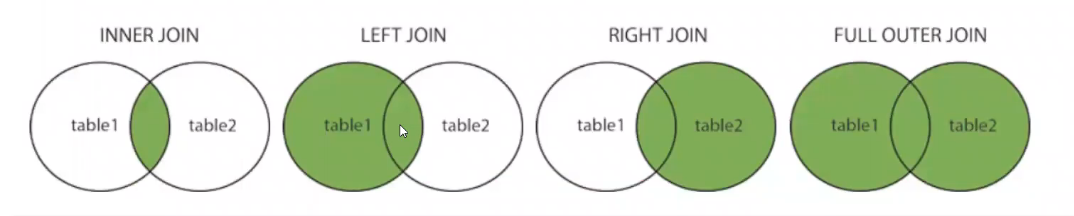

In [13]:
# Create one more Table

cursor.execute("CREATE TABLE stud_det(phone_number INT PRIMARY KEY, student_name TEXT, enrolled_date TEXT, marks INT)")

with open('Student_det1.csv','r') as file:
    no_records = 0
    for row in file:
        cursor.execute("INSERT INTO stud_det VALUES ( ?,?,?,? )",row.split(","))
        db.commit()
        no_records +=1
        
print (no_records, ' Records Inserted')

20  Records Inserted


In [14]:
# verify if records inserted

result = cursor.execute("SELECT * FROM stud_det")

for row in result:
    print(row)

(9988776604, 'Salah', '03-10-2020', 85)
(9988776605, 'Heung-Son', '21-06-2020', 39)
(9988776606, 'Ronaldo', '08-05-2020', 86)
(9988776607, 'Kane', '11-05-2022', 57)
(9988776608, 'Mane', '17-05-2022', 52)
(6609998877, 'Vardy', '17-12-2020', 54)
(6609998878, 'Jota', '06-11-2021', 45)
(6609998879, 'Bruyne', '26-11-2020', 49)
(6609998880, 'Zaha', '05-12-2020', 88)
(6609998881, 'Sterling', '29-10-2020', 61)
(9988776614, 'Toney', '31-03-2022', 71)
(9988776615, 'Maddison', '10-03-2020', 44)
(1687799866, 'Bowen', '14-02-2021', 96)
(1687799867, 'Saka', '19-12-2022', 92)
(1687799868, 'Watkins', '30-01-2021', 49)
(1687799869, 'Mount', '16-09-2022', 48)
(1687799870, 'Raphael', '15-05-2021', 50)
(1687799871, 'Mahrez', '30-10-2021', 72)
(9988776622, 'Pukki', '19-02-2021', 93)
(9988776623, 'Fernandes', '01-03-2022', 94)


In [57]:
result = cursor.execute("SELECT * FROM student_data2")       # Taking another table which was created earlier

for row in result:
    print(row)

(98997587968, 'student1@data.com', 'datascience', 65000)
(9847552647, 'Student2@data.com', 'maths2', 2560)
(857951575, 'student3@data.com', 'science2', 3560)
(9988776604, 'student4@gmail.com', 'Digital Marketing', 38000)
(9988776605, 'student5@gmail.com', 'Data Science', 133000)
(9988776606, 'student6@gmail.com', 'Data Science', 34000)
(9988776607, 'student7@gmail.com', 'Data Science', 33000)
(9988776608, 'student8@gmail.com', 'Data Science', 12900)
(99887766091, 'student9@gmail.com', 'Data Science', 40000)
(9988776610, 'student10@gmail.com', 'Data Analytics', 32500)
(9988776611, 'student11@gmail.com', 'Data Science', 41500)
(9988776613, 'student13@gmail.com', 'Digital Marketing', 23000)
(9988776614, 'student14@gmail.com', 'Data Science', 24000)
(9988776615, 'student15@gmail.com', 'Data Science', 23000)
(9988776616, 'student16@gmail.com', 'Data Science', 122500)
(9988776617, 'student17@gmail.com', 'Data Science', 29000)
(9988776618, 'student18@gmail.com', 'Data Science', 140000)
(99887

# INNER JOIN

In [58]:
sql = "SELECT student_data2.phone_number, stud_det.enrolled_date, stud_det.marks, stud_det.student_name FROM student_data2 INNER JOIN stud_det ON student_data2.phone_number = stud_det.phone_number"

result = cursor.execute(sql)
for row in result:
    print(row)       
    
#Both the table have phone_number in comman, with INNER JOIN we can return records that have matching values.

(9988776604, '03-10-2020', 85, 'Salah')
(9988776605, '21-06-2020', 39, 'Heung-Son')
(9988776606, '08-05-2020', 86, 'Ronaldo')
(9988776607, '11-05-2022', 57, 'Kane')
(9988776608, '17-05-2022', 52, 'Mane')
(9988776614, '31-03-2022', 71, 'Toney')
(9988776615, '10-03-2020', 44, 'Maddison')


# LEFT JOIN

In [59]:
sql = "SELECT student_data2.phone_number, stud_det.enrolled_date, stud_det.marks, stud_det.student_name FROM student_data2 LEFT JOIN stud_det ON student_data2.phone_number = stud_det.phone_number"

result = cursor.execute(sql)
for row in result:
    print(row)  

(857951575, None, None, None)
(998806620, None, None, None)
(998845873, None, None, None)
(998876621, None, None, None)
(9847552647, None, None, None)
(9988546622, None, None, None)
(9988776604, '03-10-2020', 85, 'Salah')
(9988776605, '21-06-2020', 39, 'Heung-Son')
(9988776606, '08-05-2020', 86, 'Ronaldo')
(9988776607, '11-05-2022', 57, 'Kane')
(9988776608, '17-05-2022', 52, 'Mane')
(9988776610, None, None, None)
(9988776611, None, None, None)
(9988776613, None, None, None)
(9988776614, '31-03-2022', 71, 'Toney')
(9988776615, '10-03-2020', 44, 'Maddison')
(9988776616, None, None, None)
(9988776617, None, None, None)
(9988776618, None, None, None)
(9988776619, None, None, None)
(98997587968, None, None, None)
(99887766091, None, None, None)


### SQLite3 does not support RIGHT JOIN and FULL OUTER JOIN

## Python and SQL (How to deal with python Code)

In [16]:
while True:
    
    try:
        
        ph_num = int(input('Your mobile number '))
        
        if len(str(ph_num)) != 10:
            print ('Enter 10 digit phone number')
            continue
        else:
            result = cursor.execute("SELECT * FROM stud_det")  #using stud_det to check the students marks using phone number
            for detail in result:
                if detail[0] == ph_num:                # detail[0] this is indexing method, it refers to phone_number
                    print ('Name : ', detail[1])       # detail[1] this is indexing method, it refers to student_name
                    print ('DOJ : ', detail[2])        # detail[2] this is indexing method, it refers to enrolled_date
                    print ('Mark : ', detail[3])       # detail[3] this is indexing method, it refers to marks
                    break
            else:
                print ('Phone number not found in database')
                break           # this break will effect on for loop not on the entire code
            continue
            
    except:
        print ('Phone number should be numeric')
        continue

Your mobile number 1254fata
Phone number should be numeric
Your mobile number 9988776615
Name :  Maddison
DOJ :  10-03-2020
Mark :  44
Your mobile number 1687799866
Name :  Bowen
DOJ :  14-02-2021
Mark :  96
Your mobile number 4568
Enter 10 digit phone number
Your mobile number 5564851456
Phone number not found in database
